In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import shapefile as shp
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 1 Creating UK Map

In [2]:
import geopandas as gpd
import pandas as pd
import json

# Create geodataframe
gdf_map = gpd.read_file(
    'C:/Users/Hafidz/2020PeopleFlux/UK_LA_Districts4.json'
)

#Set the CRS
gdf_map.crs = {'init': 'epsg:27700'}

#Check the CRS
gdf_map.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: UK - Britain and UKCS 49°46'N to 61°01'N, 7°33'W to 3°33'E
- bounds: (-9.2, 49.75, 2.88, 61.14)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [3]:
#gdf_map.head()

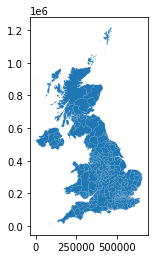

In [4]:
# Plot the map
gdf_map.plot()
plt.rcParams["figure.figsize"] = [64,36]

In [5]:
gdf_map['lad19nm'].shape
gdf_map.shape

(382, 11)

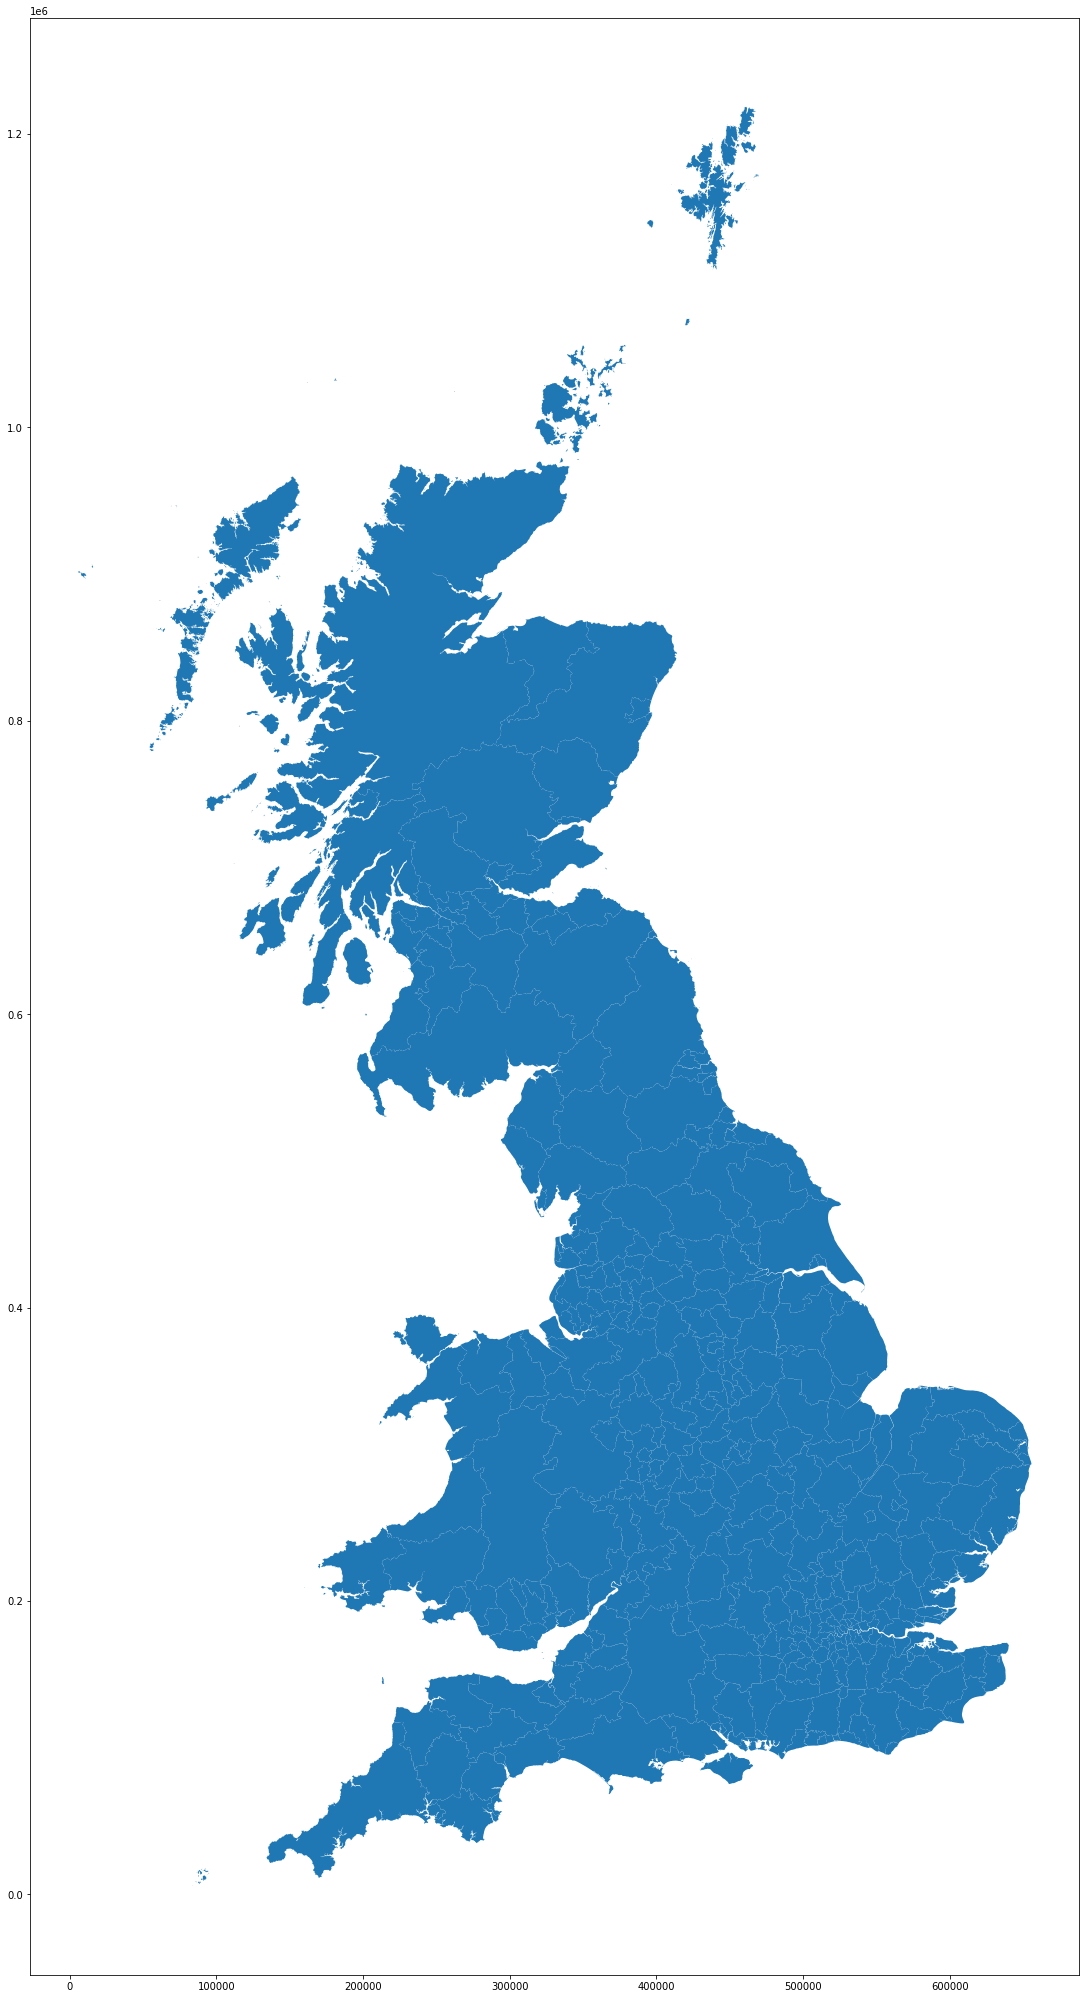

In [6]:
#Removing NI from the map, the column name lad19cd is unique for each started with E,S,NI,W
gdf_map_afterNI = gdf_map[
    ~gdf_map['lad19cd'].str.startswith('N')
]

gdf_map_afterNI.plot()

In [56]:
#gdf_map after NI removal
gdf_map_afterNI['lad19nm'].shape

(371,)

In [7]:
# Convert the CRS of gdf_map
gdf_map_afterNI = gdf_map_afterNI.to_crs(epsg='4326')

# Check the CRS
gdf_map_afterNI.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
# Check the GeoDataFrame
gdf_map_afterNI.head()

,objectid,lad19cd,lad19nm,lad19nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,E06000001,Hartlepool,,447160,531474,-1.270,54.676,93712619.818,71011.934,"POLYGON ((-1.24098 54.72318, -1.24401 54.72157..."
1,2,E06000002,Middlesbrough,,451141,516887,-1.211,54.545,53881564.271,44481.691,"MULTIPOLYGON (((-1.20097 54.57762, -1.20222 54..."
2,3,E06000003,Redcar and Cleveland,,464361,519597,-1.006,54.568,245069508.917,96703.990,"POLYGON ((-0.79423 54.55843, -0.79280 54.55955..."
3,4,E06000004,Stockton-on-Tees,,444940,518183,-1.307,54.557,204932953.781,123408.986,"POLYGON ((-1.25069 54.62531, -1.25243 54.62395..."
4,5,E06000005,Darlington,,428029,515648,-1.568,54.535,197475688.992,107206.402,"POLYGON ((-1.43834 54.59507, -1.43965 54.59381..."


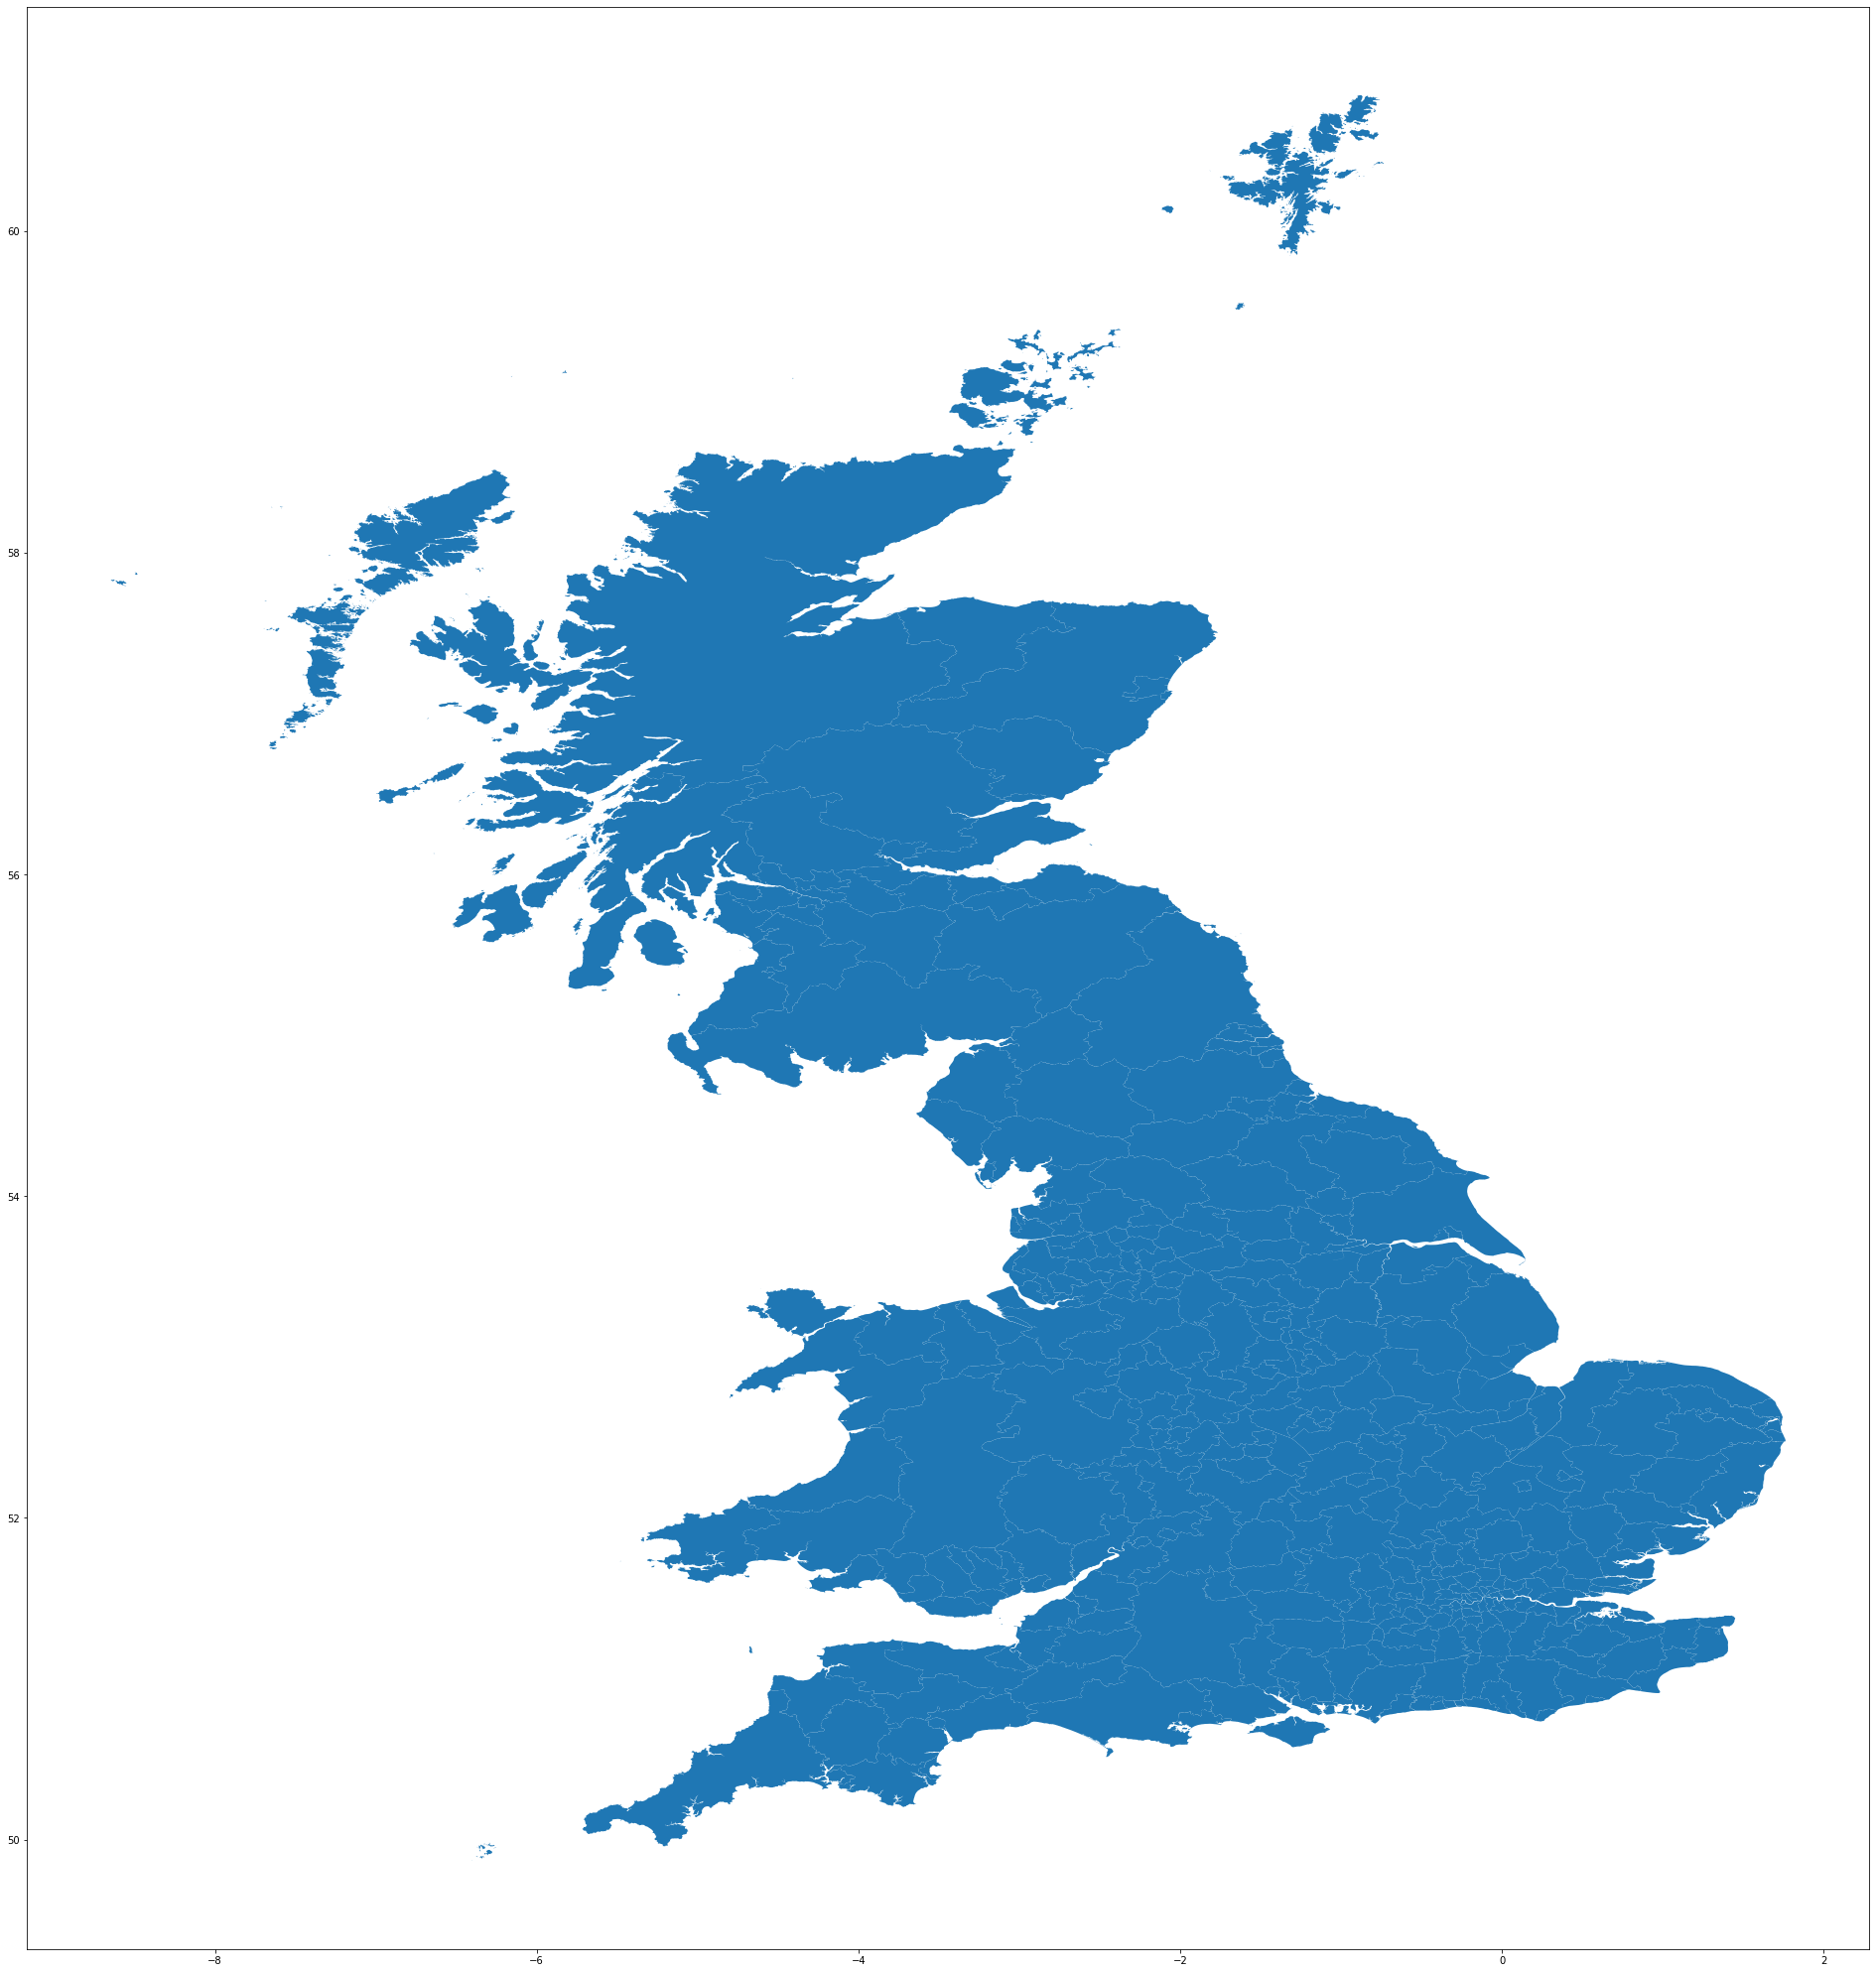

In [30]:
gdf_map_afterNI.plot();

# 2 Dataset from NOMIS UK Commute

In [13]:
# Import UK NOMIS data as the DataFrame
import csv
import pandas as pd
df_peopleflux = pd.read_csv("C:/Users/Hafidz/2020PeopleFlux/RF03EW.csv",
                        low_memory = False
                        )
# Show the DataFrame
df_peopleflux.head()

,placeofwork,ladcd19,Hartlepool,Middlesbrough,Redcar and Cleveland,Stockton-on-Tees,Darlington,County Durham,Northumberland,Gateshead,Newcastle upon Tyne,North Tyneside,South Tyneside,Sunderland,Halton,Warrington,Blackburn with Darwen,Blackpool,Cheshire East,Cheshire West and Chester,Allerdale,Barrow-in-Furness,Carlisle,Copeland,Eden,South Lakeland,Burnley,Chorley,Fylde,Hyndburn,Lancaster,Pendle,Preston,Ribble Valley,Rossendale,South Ribble,West Lancashire,Wyre,Bolton,Bury,Manchester,Oldham,Rochdale,Salford,Stockport,Tameside,Trafford,Wigan,Knowsley,Liverpool,St. Helens,Sefton,Wirral,"Kingston upon Hull, City of",East Riding of Yorkshire,North East Lincolnshire,North Lincolnshire,York,Craven,Hambleton,Harrogate,Richmondshire,Ryedale,Scarborough,Selby,Barnsley,Doncaster,Rotherham,Sheffield,Bradford,Calderdale,Kirklees,Leeds,Wakefield,Derby,Leicester,Rutland,Nottingham,Amber Valley,Bolsover,Chesterfield,Derbyshire Dales,Erewash,High Peak,North East Derbyshire,South Derbyshire,Blaby,Charnwood,Harborough,Hinckley and Bosworth,Melton,North West Leicestershire,Oadby and Wigston,Boston,East Lindsey,Lincoln,North Kesteven,South Holland,South Kesteven,West Lindsey,Corby,Daventry,East Northamptonshire,Kettering,Northampton,South Northamptonshire,Wellingborough,Ashfield,Bassetlaw,Broxtowe,Gedling,Mansfield,Newark and Sherwood,Rushcliffe,"Herefordshire, County of",Telford and Wrekin,Stoke-on-Trent,Shropshire,Cannock Chase,East Staffordshire,Lichfield,Newcastle-under-Lyme,South Staffordshire,Stafford,Staffordshire Moorlands,Tamworth,North Warwickshire,Nuneaton and Bedworth,Rugby,Stratford-on-Avon,Warwick,Bromsgrove,Malvern Hills,Redditch,Worcester,Wychavon,Wyre Forest,Birmingham,Coventry,Dudley,Sandwell,Solihull,Walsall,Wolverhampton,Peterborough,Luton,Southend-on-Sea,Thurrock,Bedford,Central Bedfordshire,Cambridge,East Cambridgeshire,Fenland,Huntingdonshire,South Cambridgeshire,Basildon,Braintree,Brentwood,Castle Point,Chelmsford,Colchester,Epping Forest,Harlow,Maldon,Rochford,Tendring,Uttlesford,Broxbourne,Dacorum,East Hertfordshire,Hertsmere,North Hertfordshire,St Albans,Stevenage,Three Rivers,Watford,Welwyn Hatfield,Breckland,Broadland,Great Yarmouth,King's Lynn and West Norfolk,North Norfolk,Norwich,South Norfolk,Babergh,Forest Heath,Ipswich,Mid Suffolk,St Edmundsbury,Suffolk Coastal,Waveney,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith and Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington and Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,"Westminster,City of London",Medway,Bracknell Forest,West Berkshire,Reading,Slough,Windsor and Maidenhead,Wokingham,Milton Keynes,Brighton and Hove,Portsmouth,Southampton,Isle of Wight,Aylesbury Vale,Chiltern,South Bucks,Wycombe,Eastbourne,Hastings,Lewes,Rother,Wealden,Basingstoke and Deane,East Hampshire,Eastleigh,Fareham,Gosport,Hart,Havant,New Forest,Rushmoor,Test Valley,Winchester,Ashford,Canterbury,Dartford,Dover,Gravesham,Maidstone,Sevenoaks,Shepway,Swale,Thanet,Tonbridge and Malling,Tunbridge Wells,Cherwell,Oxford,South Oxfordshire,Vale of White Horse,West Oxfordshire,Elmbridge,Epsom and Ewell,Guildford,Mole Valley,Reigate and Banstead,Runnymede,Spelthorne,Surrey Heath,Tandridge,Waverley,Woking,Adur,Arun,Chichester,Crawley,Horsham,Mid Sussex,Worthing,Bath and North East Somerset,"Bristol, City of","Cornwall,Isles of Scilly",Wiltshire,North Somerset,South Gloucestershire,Plymouth,Torbay,Bournemouth,Poole,Swindon,East Devon,Exeter,Mid Devon,North Devon,South Hams,Teignbridge,Torridge,West Devon,Christchurch,East Dorset,North Dorset,Purbeck,West Dorset,Weymouth and Portland,Cheltenham,Cotswold,Forest of Dean,Gloucester,Stroud,Tewkesbury,Mendip,Sedgemoor,South Somerset,Taunton Deane,West Somerset,Isle of Anglesey,Gwynedd,Conwy,Denbighshire,Flintshire,Wrexham,Ceredigion,Pembrokeshire,Carmarthenshire,Swansea,Neath 

# Making a Map: Plotting basic map

In [31]:
import geopandas as gpd

# Make the geo DataFrame
gdf_pl = gpd.GeoDataFrame(
    gdf_map_afterNI, 
    geometry=gpd.points_from_xy(
        x=gdf_map_afterNI['long'],
        y=gdf_map_afterNI['lat']
    )
)

In [34]:
def plot_map_1():
    """Plot a map and data"""
    
    # Base Map
    base_map = gdf_map_afterNI.plot(
        color='white',
        edgecolor='grey',
        linewidth=0.5,
        figsize=(15, 8),
        legend=True
    )
    base_map.axis('off')
    base_map.set_title('UK Commute NOMIS Data 2020')

    # Data
    gdf_pl.plot(ax=base_map);

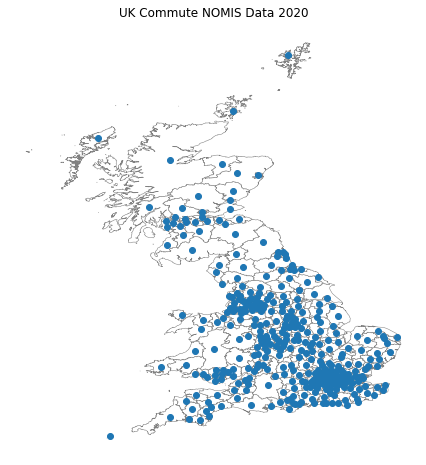

In [35]:
plot_map_1()

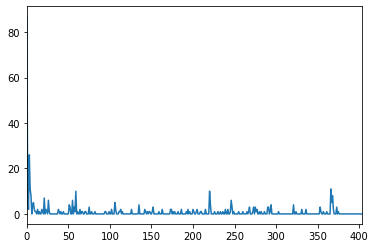

In [29]:
peopleflux['Hartlepool'].plot()

In [30]:
set(peopleflux['placeofwork']) - set(gdf_map['lad19nm'])

{'Antrim',
 'Ards',
 'Armagh',
 'Ballymena',
 'Ballymoney',
 'Banbridge',
 'Bournemouth',
 'Carrickfergus',
 'Castlereagh',
 'Christchurch',
 'Coleraine',
 'Cookstown',
 'Cornwall,Isles of Scilly',
 'Craigavon',
 'Derry',
 'Down',
 'Dungannon',
 'East Dorset',
 'Eilean Siar',
 'Fermanagh',
 'Forest Heath',
 'Larne',
 'Limvady',
 'Lisburn',
 'Magherafelt',
 'Moyle',
 'Newry and Mourne',
 'Newtownabbey',
 'North Dorset',
 'North Down',
 'Omagh',
 'Poole',
 'Purbeck',
 'Shepway',
 'St Edmundsbury',
 'Strabane',
 'Suffolk Coastal',
 'Taunton Deane',
 'The Vale of Glamorgan',
 'Waveney',
 'West Dorset',
 'West Somerset',
 'Westminster,City of London',
 'Weymouth and Portland'}

In [ ]:
peopleflux.pointplot(df, projection=gcrs.AlbersEqualArea(), hue='Hatrlepool', legend=True)